# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [75]:
import pandas             as pd
import numpy              as np

import matplotlib.pyplot  as plt
import folium

from welly                import Project   
from welly                import Location
from welly                import Well

from mpl_toolkits.mplot3d import Axes3D


In [37]:
pwd

'/home/ehgeraldo/repos/Well_Logs_Plots'

In [38]:
ls -l

total 8976
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  311142 set  8 20:30 c10.10-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395869 ago 29 22:43 c3.3-ehgeraldo_matplotlib_subplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplotlib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201759 set  2 20:30 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247070 set  2 20:29 c6.6-ehgeraldo_matplotlib_subplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  803836 set  2 20:29 c7.7-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  217362 set  2 20:28 c8.8-ehgeraldo_well_boxplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  269012 set  2 20:43 c9.9-ehgeraldo_well_missing_data

In [39]:
wells = Project.from_las('/home/ehgeraldo/repos/Well_Logs_Plots/data/wells/*.las')

4it [00:07,  1.90s/it]


## Well Data

In [40]:
wells

Index,UWI,Data,Curves
0,L06-06,5 curves,"GR, DT, RHOB, DRHO, NPHI"
1,L06-07,5 curves,"GR, DT, RHOB, DRHO, NPHI"
2,L06-06,5 curves,"GR, DT, RHOB, DRHO, NPHI"
3,L07-01,4 curves,"GR, DT, RHOB, NPHI"


## Wells UWIS

In [41]:
wells.uwis

['L06-06', 'L06-07', 'L06-06', 'L07-01']

## Individual well details

In [42]:
for well in wells:
    print(well)

Well(uwi: 'L06-06', name: 'L06-06', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L06-07', name: 'L06-07', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L06-06', name: 'L06-06', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L07-01', name: 'L07-01', 4 curves: ['GR', 'DT', 'RHOB', 'NPHI'])


## Print well name and location

In [43]:
for well in wells:
    print(f'{well.name} \t {well.location.latitude} \t {well.location.longitude}'.expandtabs(10))

L06-06     53.808408           4.672192
L06-07     53.706549           4.898703
L06-06     53.808408           4.672192
L07-01     53.722768           4.796468


In [51]:
well_dict = {}
for well in wells:
    well_dict[well.uwi] = {'well.name':well.name,
                            'Latitude':well.location.latitude,
                            'Longitude':well.location.longitude                         
                          }
    
wells_df = pd.DataFrame.from_dict(well_dict, orient='index')

wells_df.reset_index(inplace=True)

wells_df.rename(columns={'index':'UWI'}, inplace=True)

In [52]:
wells_df

,UWI,well.name,Latitude,Longitude
0,L06-06,L06-06,53.808408,4.672192
1,L06-07,L06-07,53.706549,4.898703
2,L07-01,L07-01,53.722768,4.796468


## Mapping the Well Locations

In [70]:
mean_lat  =  wells_df['Latitude'].mean()
mean_long = wells_df['Longitude'].mean()

m = folium.Map(location=[mean_lat, mean_long], zoom_start=7)

for index, well_location in wells_df.iterrows():
    folium.Marker([well_location['Latitude'], wells_location['Longitude']])
   

m

## Plotting curves from multiple wells

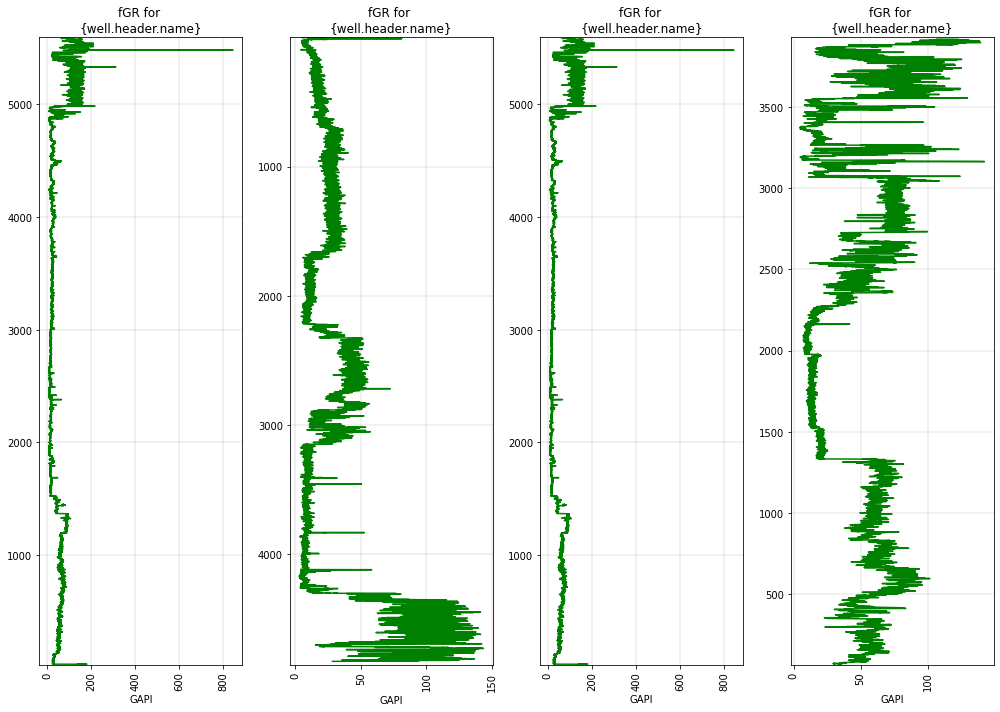

In [77]:
fig, axs = plt.subplots(figsize=(14,10), ncols=len(wells))

for (ax, well) in zip(axs, wells):
    gr = well.get_curve('GR')
    if gr is not None:
        ax = gr.plot(ax=ax, c='green')
    ax.set_title("fGR for \n{well.header.name}")
    
plt.tight_layout()
plt.show()

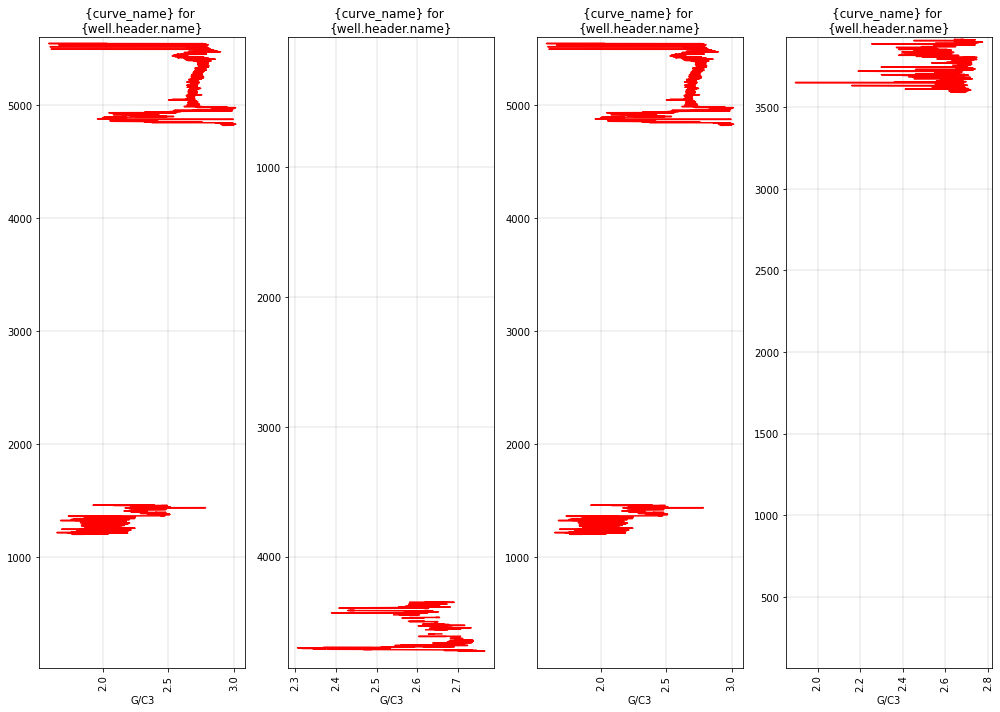

In [82]:
fig, axs = plt.subplots(figsize=(14,10), ncols=len(wells))

curve_name = 'RHOB'

for (ax, well) in zip(axs, wells):
    rhob = well.get_curve(curve_name)
    if rhob is not None:
        ax = rhob.plot(ax=ax, c='red')
    ax.set_title("{curve_name} for \n{well.header.name}")
    
plt.tight_layout()
plt.show()

## Well Log Data Quality

In [83]:
import welly.quality as wq
from IPython.display import HTML

In [107]:
tests = { 'Each': [wq.no_flat,
                  wq.no_gaps,
                  wq.not_empty],
         
         'GR': [
             wq.all_positive,
             wq.all_between(0,250),
             wq.check_units(['API','GAPI']),
         ],
         'RHOB': [ 
             wq.all_positive,
             wq.all_between(1.5,3),
             wq.check_units(['G/CC','g/cm3']),
             
        ]
        }

In [108]:
data_qc_table = wells.curve_table_html(keys=['GR','RHOB'], tests=tests)

In [112]:
qc_dict = {}
for well in wells:
    qc_dict[well.name] = well.qc_table_html(tests)

In [113]:
HTML(qc_dict['L06-06'])

Curve,Passed,Score,no_flat,not_empty,no_gaps,all_positive,all_between,check_units
GR,4 / 6,0.667,True,True,False,True,False,True
DT,2 / 3,0.667,True,True,False,,,
RHOB,3 / 6,0.500,True,True,False,True,False,False
DRHO,2 / 3,0.667,True,True,False,,,
NPHI,2 / 3,0.667,True,True,False,,,


In [114]:
HTML(qc_dict['L06-07'])

Curve,Passed,Score,no_flat,not_empty,no_gaps,all_positive,all_between,check_units
GR,6 / 6,1.000,True,True,True,True,True,True
DT,2 / 3,0.667,True,True,False,,,
RHOB,4 / 6,0.667,True,True,False,True,True,False
DRHO,2 / 3,0.667,True,True,False,,,
NPHI,2 / 3,0.667,True,True,False,,,


In [115]:
HTML(qc_dict['L07-01'])

Curve,Passed,Score,no_flat,not_empty,no_gaps,all_positive,all_between,check_units
GR,5 / 6,0.833,True,True,False,True,True,True
DT,2 / 3,0.667,True,True,False,,,
RHOB,5 / 6,0.833,True,True,True,True,True,False
NPHI,3 / 3,1.000,True,True,True,,,
